#Pre-Process (unsupervised), Split it into Train,Dev and Test Set

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import sklearn

In [33]:
filename = 'Default.csv'
data = pd.read_csv(filename)
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [34]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [35]:
data.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Y            int64
dtype: object

In [36]:
y = data[['Y']]
dropcols = ['ID','Y']
X = data.drop(dropcols,1)
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
Y            30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


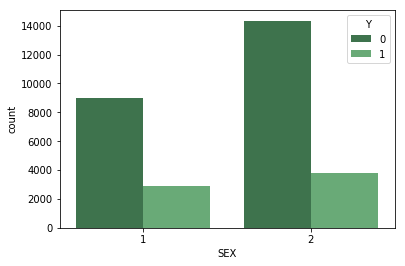

In [39]:
list(set(data['SEX'].tolist()))
sns.countplot(x="SEX", hue='Y',data=data, palette="Greens_d")

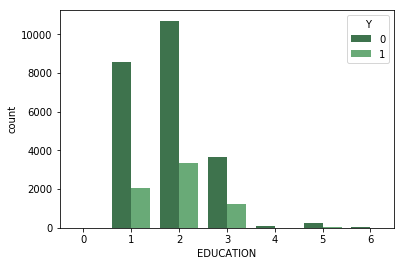

In [40]:
sns.countplot(x="EDUCATION", hue='Y',data=data, palette="Greens_d")

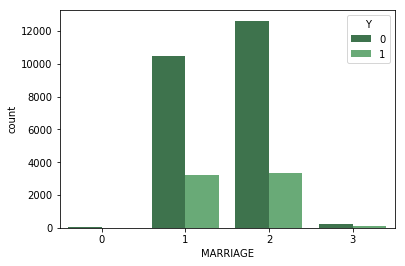

In [41]:
sns.countplot(x="MARRIAGE", hue='Y',data=data, palette="Greens_d")

In [42]:
fil = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[fil, 'EDUCATION'] = 4
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3

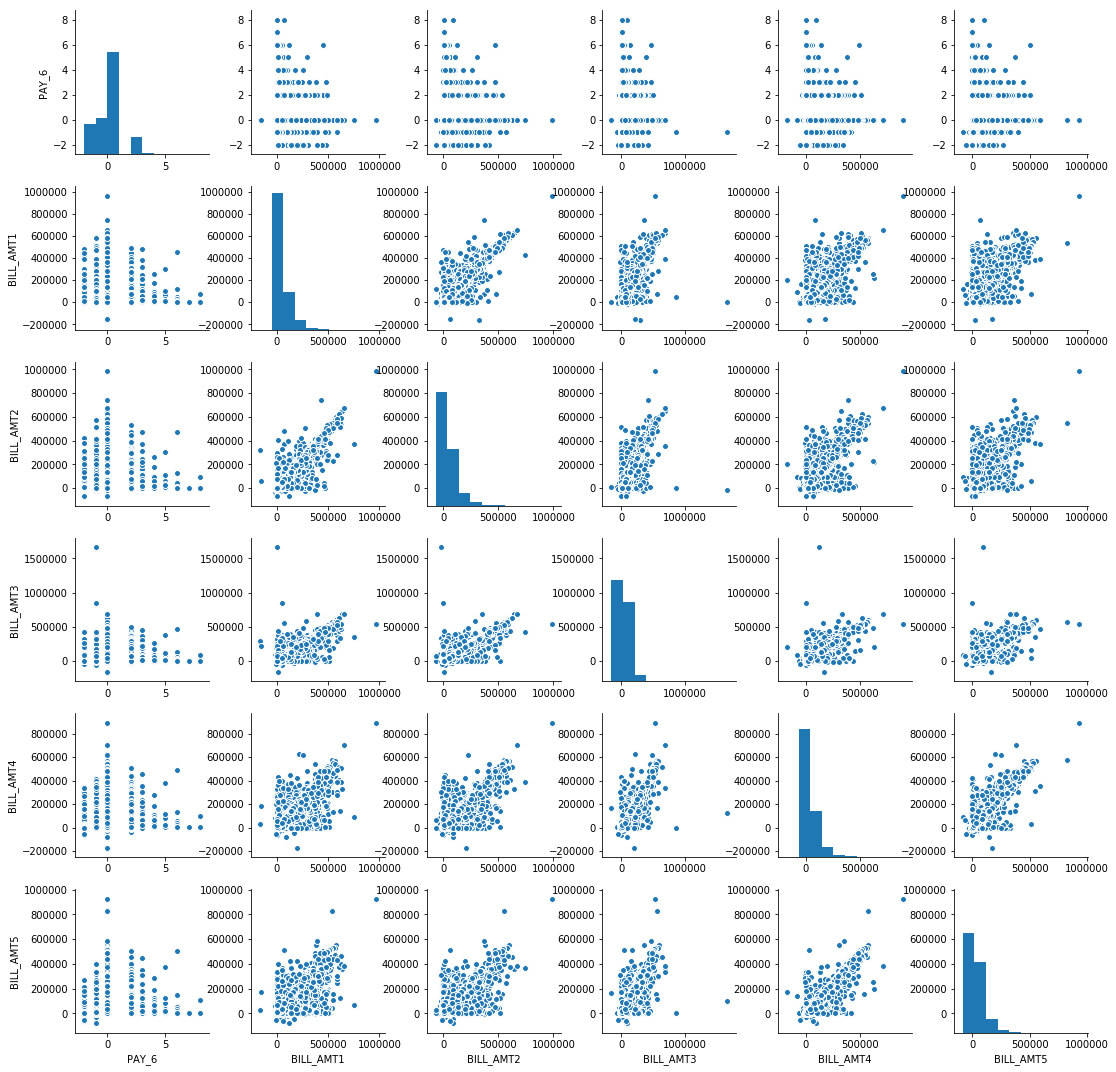

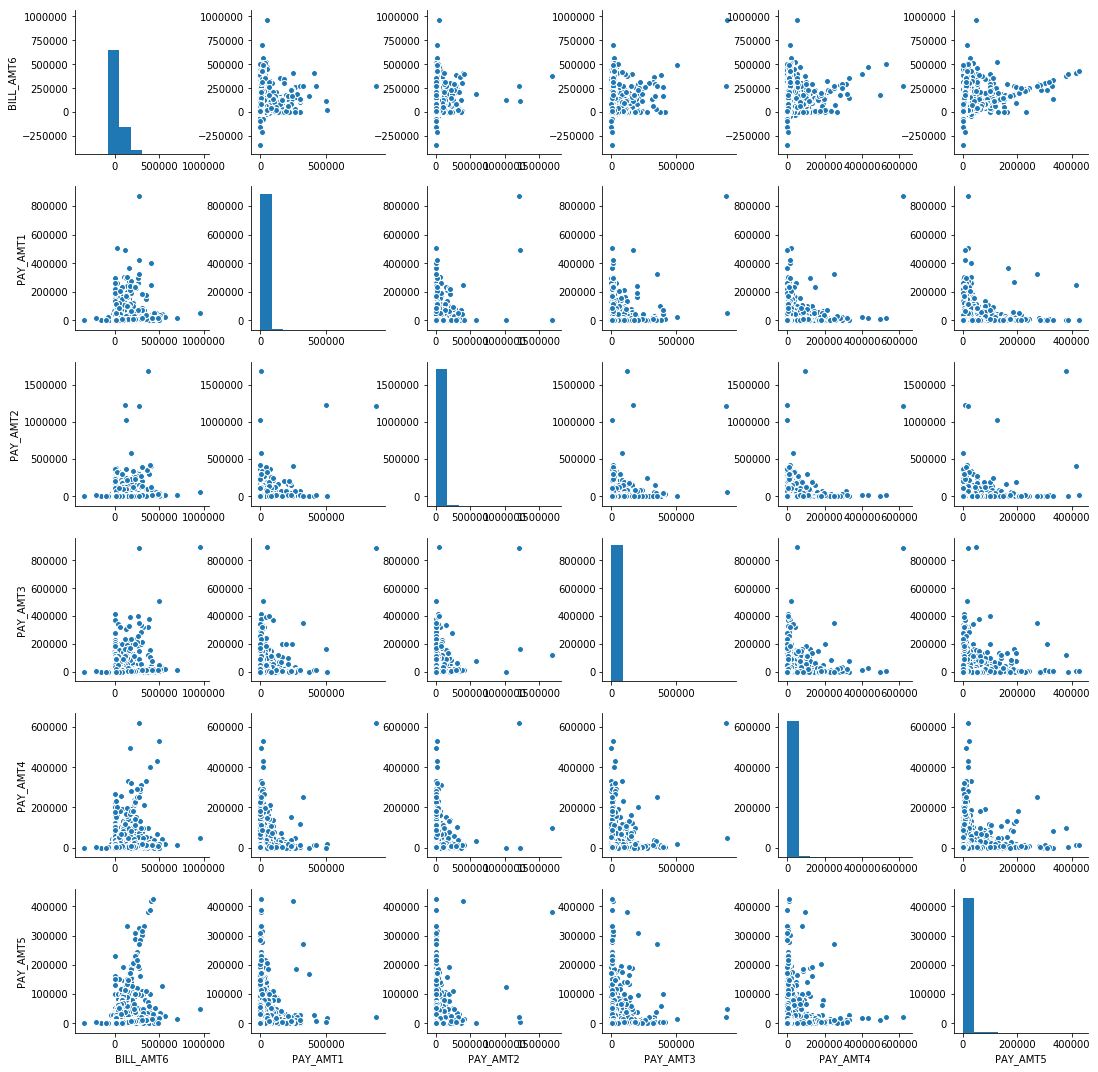

In [43]:
sns.pairplot(data, vars=data.columns[11:17], kind='scatter')
sns.pairplot(data, vars=data.columns[17:23])

In [45]:
data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
ID,1.000000,0.026179,0.018497,0.037659,-0.028208,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.037659,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.112593,0.129703,0.122425,0.116531,...,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.028208,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.018678,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.030575,-0.271214,-0.057643,0.112593,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.129703,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.122425,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.116531,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [46]:
data.drop('ID',1,inplace =  True)

In [47]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
              'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
col_to_norm =[x.upper() for x in col_to_norm]

data[col_to_norm]=data[col_to_norm].apply(lambda x: (x-np.mean(x))/np.std(x))

col_pay = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data[col_pay] = data[col_pay].apply(lambda x: x+2)

X = data.iloc[:, 0:23]
y = data.Y
enc = OneHotEncoder(categorical_features=[1,2,3,5,6,7,8,9,10])
X = enc.fit_transform(X)

In [48]:
X.shape

(30000, 87)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.33, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_dev, y_dev, test_size=0.5, random_state=42)

In [57]:
clf = linear_model.LogisticRegression()

mj_clf_train = X_train.shape[0]* [0]
mj_clf_dev = X_dev.shape[0]* [0]
mj_clf_test = X_test.shape[0]* [0]

scores = cross_validate(clf, X_train, y_train, scoring='roc_auc',cv=5, return_train_score=False)
print ("the auc of each fold of prediction is")
summer = 0
for score in scores['test_score']:
    summer+=score
    print (score)
print ("The average auc is", summer/5)

the auc of each fold of prediction is
0.769611071429
0.766496785714
0.776828585147
0.763427671156
0.762108813368
The average auc is 0.767694585363


In [62]:
clf.fit(X_train, y_train)
dev_label_predicted = clf.predict(X_dev)
print ("dev auc is ",roc_auc_score(y_score=dev_label_predicted,y_true = y_dev))
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_true = y_dev,y_pred =dev_label_predicted,).ravel()
print (sklearn.metrics.confusion_matrix(dev_label_predicted, y_dev))
print ("True positive rate is", (tp)/(tp+fn))

dev accuracy is  0.650835806207
[[3669  722]
 [ 175  384]]
True positive rate is 0.347197106691


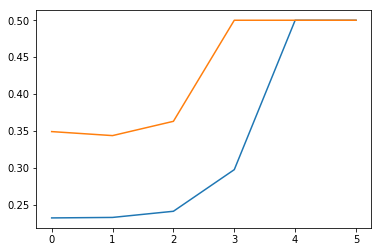

In [65]:
C_values = [1,0.1,0.01,0.001,0.0001,0.00001]
#C_values = list(reversed(C_values))
train_error = list()
dev_error = list()

for c_val in C_values:
    clf = linear_model.LogisticRegression(penalty='l1', C = c_val)
    scores = cross_validate(clf, X_train, y_train, scoring='roc_auc',cv=5, return_train_score=False)
    summer = 0
    for score in scores['test_score']:
        summer+=score
    train_error.append(summer/5)
    clf.fit(X_train,y_train)
    dev_label_predicted = clf.predict(X_dev)
    dev_error.append(roc_auc_score(y_score=dev_label_predicted,y_true = y_dev))

for i in range(0,len(C_values),1):
    train_error[i] = 1-train_error[i]
    dev_error[i] = 1-dev_error[i] 

C_values = [0,1,2,3,4,5]
plt.plot(C_values, train_error, C_values, dev_error)
plt.show()

In [66]:
dev_error

[0.34916419379300878, 0.34373923900096537, 0.36309139628137499, 0.5, 0.5, 0.5]

In [67]:
train_error

[0.23223131398778651,
 0.2328884273454338,
 0.2412321223514271,
 0.29762905022478703,
 0.5,
 0.5]

In [71]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(1000), max_iter=1000)  
mlp.fit(X_train, y_train)  
dev_label_predicted = mlp.predict(X_dev)
roc_auc_score(y_score=dev_label_predicted,y_true = y_dev)

0.63727647699710022